# Сегментация клиентов  банка по потреблению продуктов банка

# Материалы
**Презентация для отдела маркетинга**\
https://drive.google.com/file/d/18td-7-NobqDNRLFECv95KA_vuaf8eOcw/

**Дашборд,**\
который отражает количество клиентов в зависимости от числа используемых продуктов. В том числе с фильтров ушедших.
Есть возможность выборки по нужному городу


https://drive.google.com/file/d/18td-7-NobqDNRLFECv95KA_vuaf8eOcw

**Задача:**\
*Проанализируйте клиентов регионального банка и сегментировать пользователей
по количеству потребляемых продуктов.\
Проведите исследовательский анализ данных,\
Сегментируйте пользователей на основе данных о количестве потребляемых
продуктов,\
Сформулируйте и проверьте статистические гипотезы.\
Проверьте гипотезу различия дохода между теми клиентами, которые
пользуются двумя продуктами банка, и теми, которые пользуются одним.\
Сформулируйте и проверьте статистическую гипотезу относительно
представленных данных.*

## Загрузка данных и нужных в работе библиотек


In [1]:
#настривааем оружение и загружаем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns

import scipy.stats as stats
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore') # отключаем некритичные уведомления

Описание данных:\
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Задаем путь к таблице с данным

In [2]:
try:
    df = pd.read_csv('/datasets/bank_dataset.csv', sep=',')  
except:
    from google.colab import drive
    drive.mount('/content/drive')
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dip/bank_dataset.csv', sep=',')
     
#df = pd.read_csv(r'C:\Dev\Jupyter\dist\projects\bank_dataset.csv', sep=',') 

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Описание данных:
мы имеем дело с записыми в 10000 строк, взаимодейсвие с банком ведется по следующим колонкам: 

userid — идентификатор пользователя,\
score — баллы кредитного скоринга (чем больше тем лучше - надженее клиент),\
City — город,\
Gender — пол,\
Age — возраст,\
Objects — количество объектов в собственности,\
Balance — баланс на счёте,\
Products — количество продуктов, которыми пользуется клиент,\
CreditCard — есть ли кредитная карта,\
Loyalty — активный клиент,\
estimated_salary — заработная плата клиента,\
Churn — ушёл или нет.(1 ушел, 0 остался)

**Вывод по 1 пункту:**\
*данные загружены и есть понимание, что нужно сделать с ними для дальнейшего анализа.*

## Предобработка данных

In [4]:
#проверю на дубликаты
df.duplicated().sum()

0

Чтобы оценить реалистичность данных посмотрим также какие есть уникальные записи во всех колонках кроме баланса  и зарплаты - так как эти данные точно будут разными

In [5]:
for col in df.columns:
    
    if df[col].dtype == "object" or df[col].dtype == "int64":
    
        print(col)
        print(df[col].unique())        
        print()

userid
[15677338 15690047 15662040 ... 15627268 15725091 15671055]

score
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 6

In [6]:
#посмотрим как распредеделены активные клиенты
df.groupby('Loyalty')['Loyalty'].count()

Loyalty
0    4849
1    5151
Name: Loyalty, dtype: int64

In [7]:
#проверим также все ли строки содержат записи о уникальных пользователей
df['userid'].nunique()

10000

Явных дубликатов нет, все пользователе также записаны под уникальными номерами. Ошибок в городе, поле, возрасте так же нет.

In [8]:
#приводим названия колонок к змеиному регистру
df.columns = df.columns.str.lower()
#исправим название колонок для удобства в дальнейшей работе
df = df.rename(columns={'userid':'user_id'})
df = df.rename(columns={'creditcard':'credit_card'})

In [9]:
#изменим тип estimated_salary на int
df['estimated_salary'] = df['estimated_salary'].astype('int')

In [10]:
#проверим кол-во пропусков по колонкам и их процент относительно всех данных
numb_of_null = pd.DataFrame(columns=['names'], data=df.columns)
numb_of_null['кол-во пропущенных значений'] = df.isnull().sum().values
numb_of_null['процент пропусков ко всем данным'] = 100*df.isnull().sum().values/df.shape[0]
numb_of_null 

,names,кол-во пропущенных значений,процент пропусков ко всем данным
0,user_id,0,0.00
1,score,0,0.00
2,city,0,0.00
3,gender,0,0.00
4,age,0,0.00
5,objects,0,0.00
6,balance,3617,36.17
7,products,0,0.00
8,credit_card,0,0.00
9,loyalty,0,0.00


Отсутствуют 36.17% значений баланса возможно у клиента нет денег или уже не пользуются картой.\

Чтобы проверить есть ли сильная зависимость от баланса с другими данными, посмотрим на 
корреляция признаков у клиентов с пропуском данных и на 
корреляция признаков у клиентов с заполненными данными об остатке на счете


Text(0.5, 1.0, 'Корреляция признаков у клиентов с пропуском данных об остатке на счете')

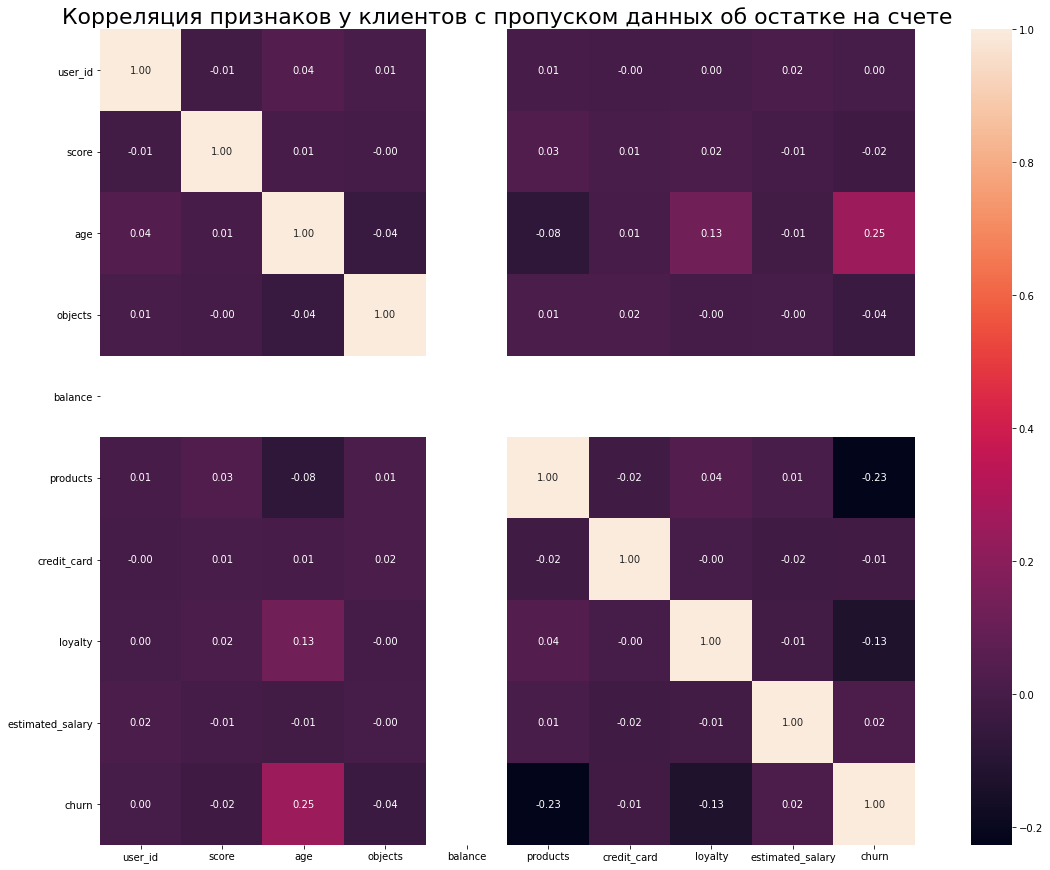

In [11]:
corr = df.loc[df['balance'].isnull() == True].corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corr, annot = True, fmt = '0.2f', square=True);
plt.title('Корреляция признаков у клиентов с пропуском данных об остатке на счете', fontsize=22)

Text(0.5, 1.0, 'Корреляция признаков у клиентов с заполненными данными об остатке на счете')

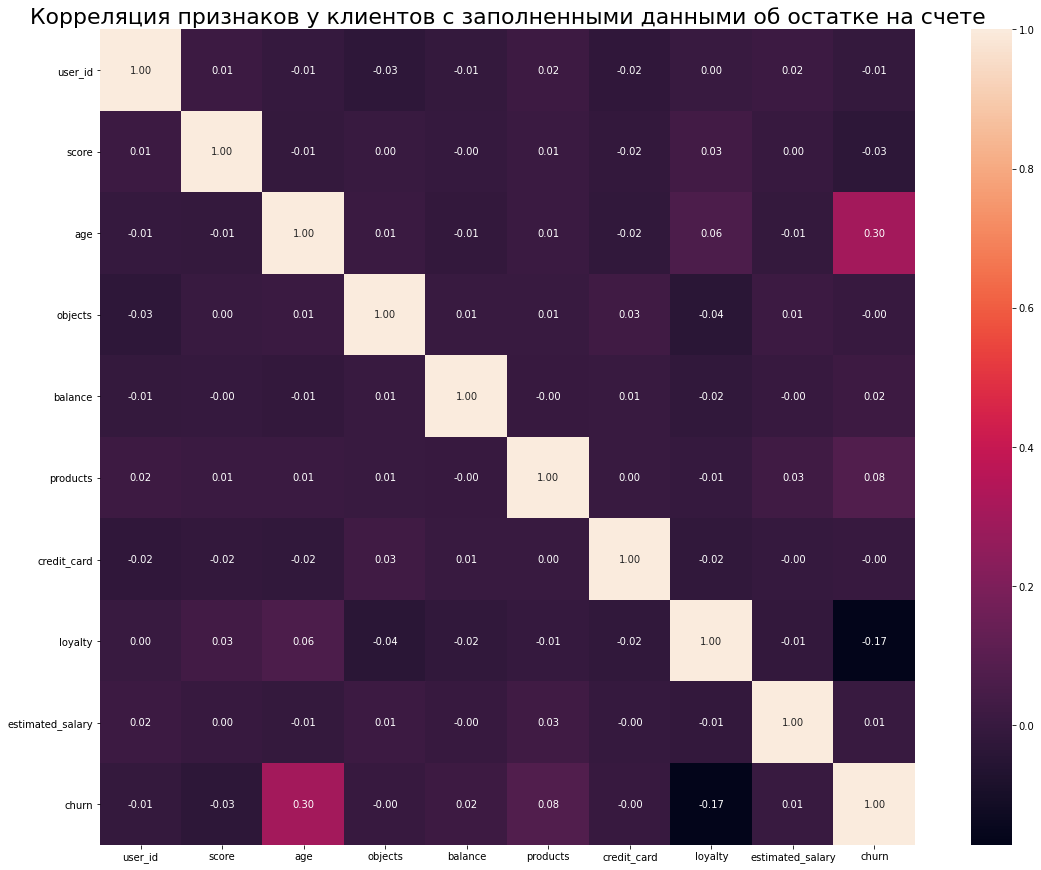

In [12]:
corr = df.loc[df['balance'].isnull() == False].corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corr, annot = True, fmt = '0.2f', square=True);
plt.title('Корреляция признаков у клиентов с заполненными данными об остатке на счете', fontsize=22)

С помощиью графиков  совместного распределения посмотрим признаки для клиентов с нулевым балансом и ненулевым балансом с добавлением третьего измерения  - ушел/остался.

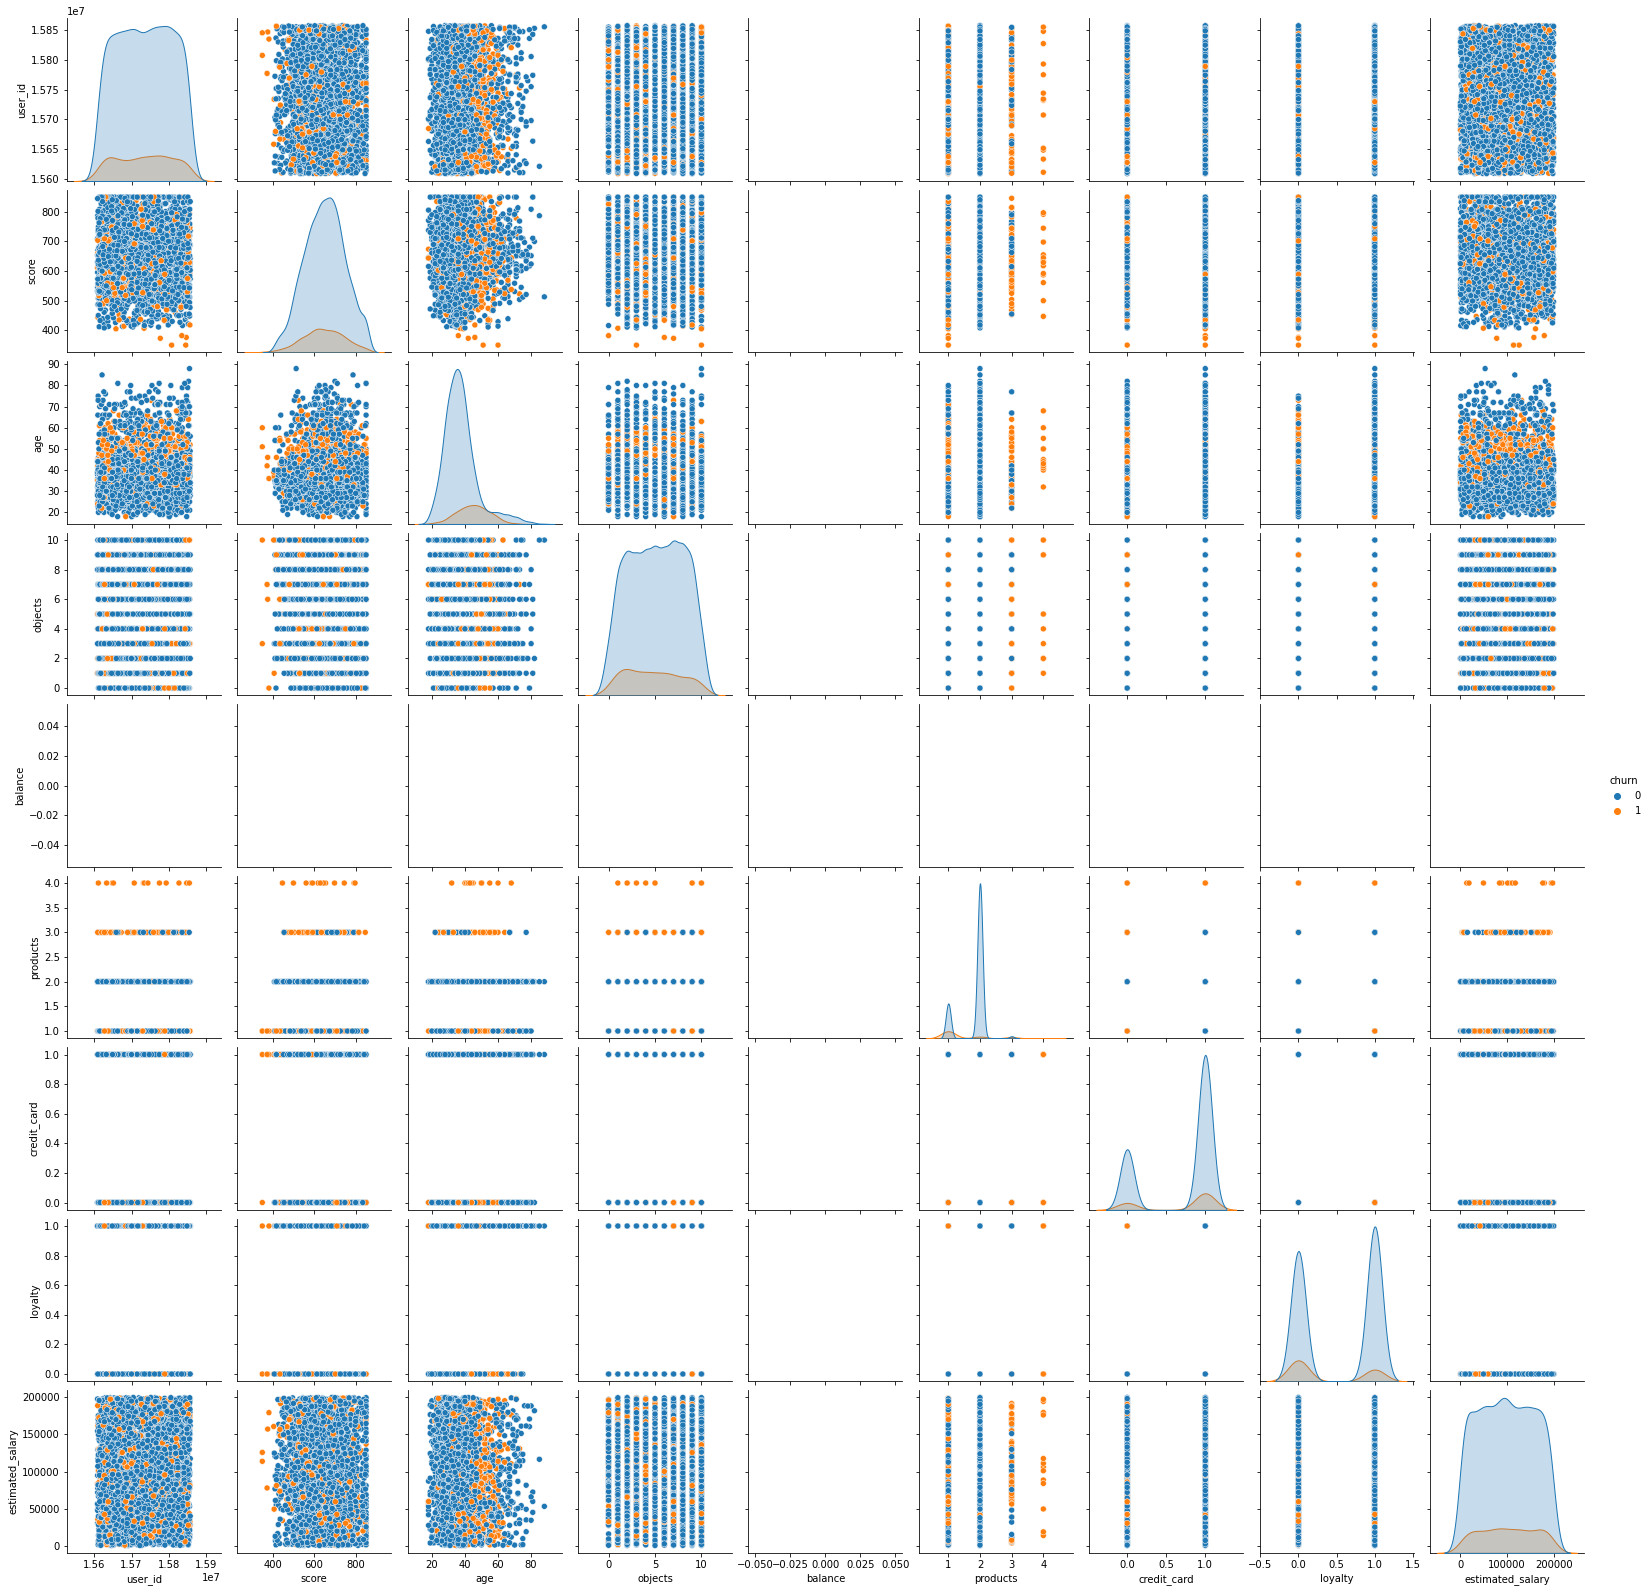

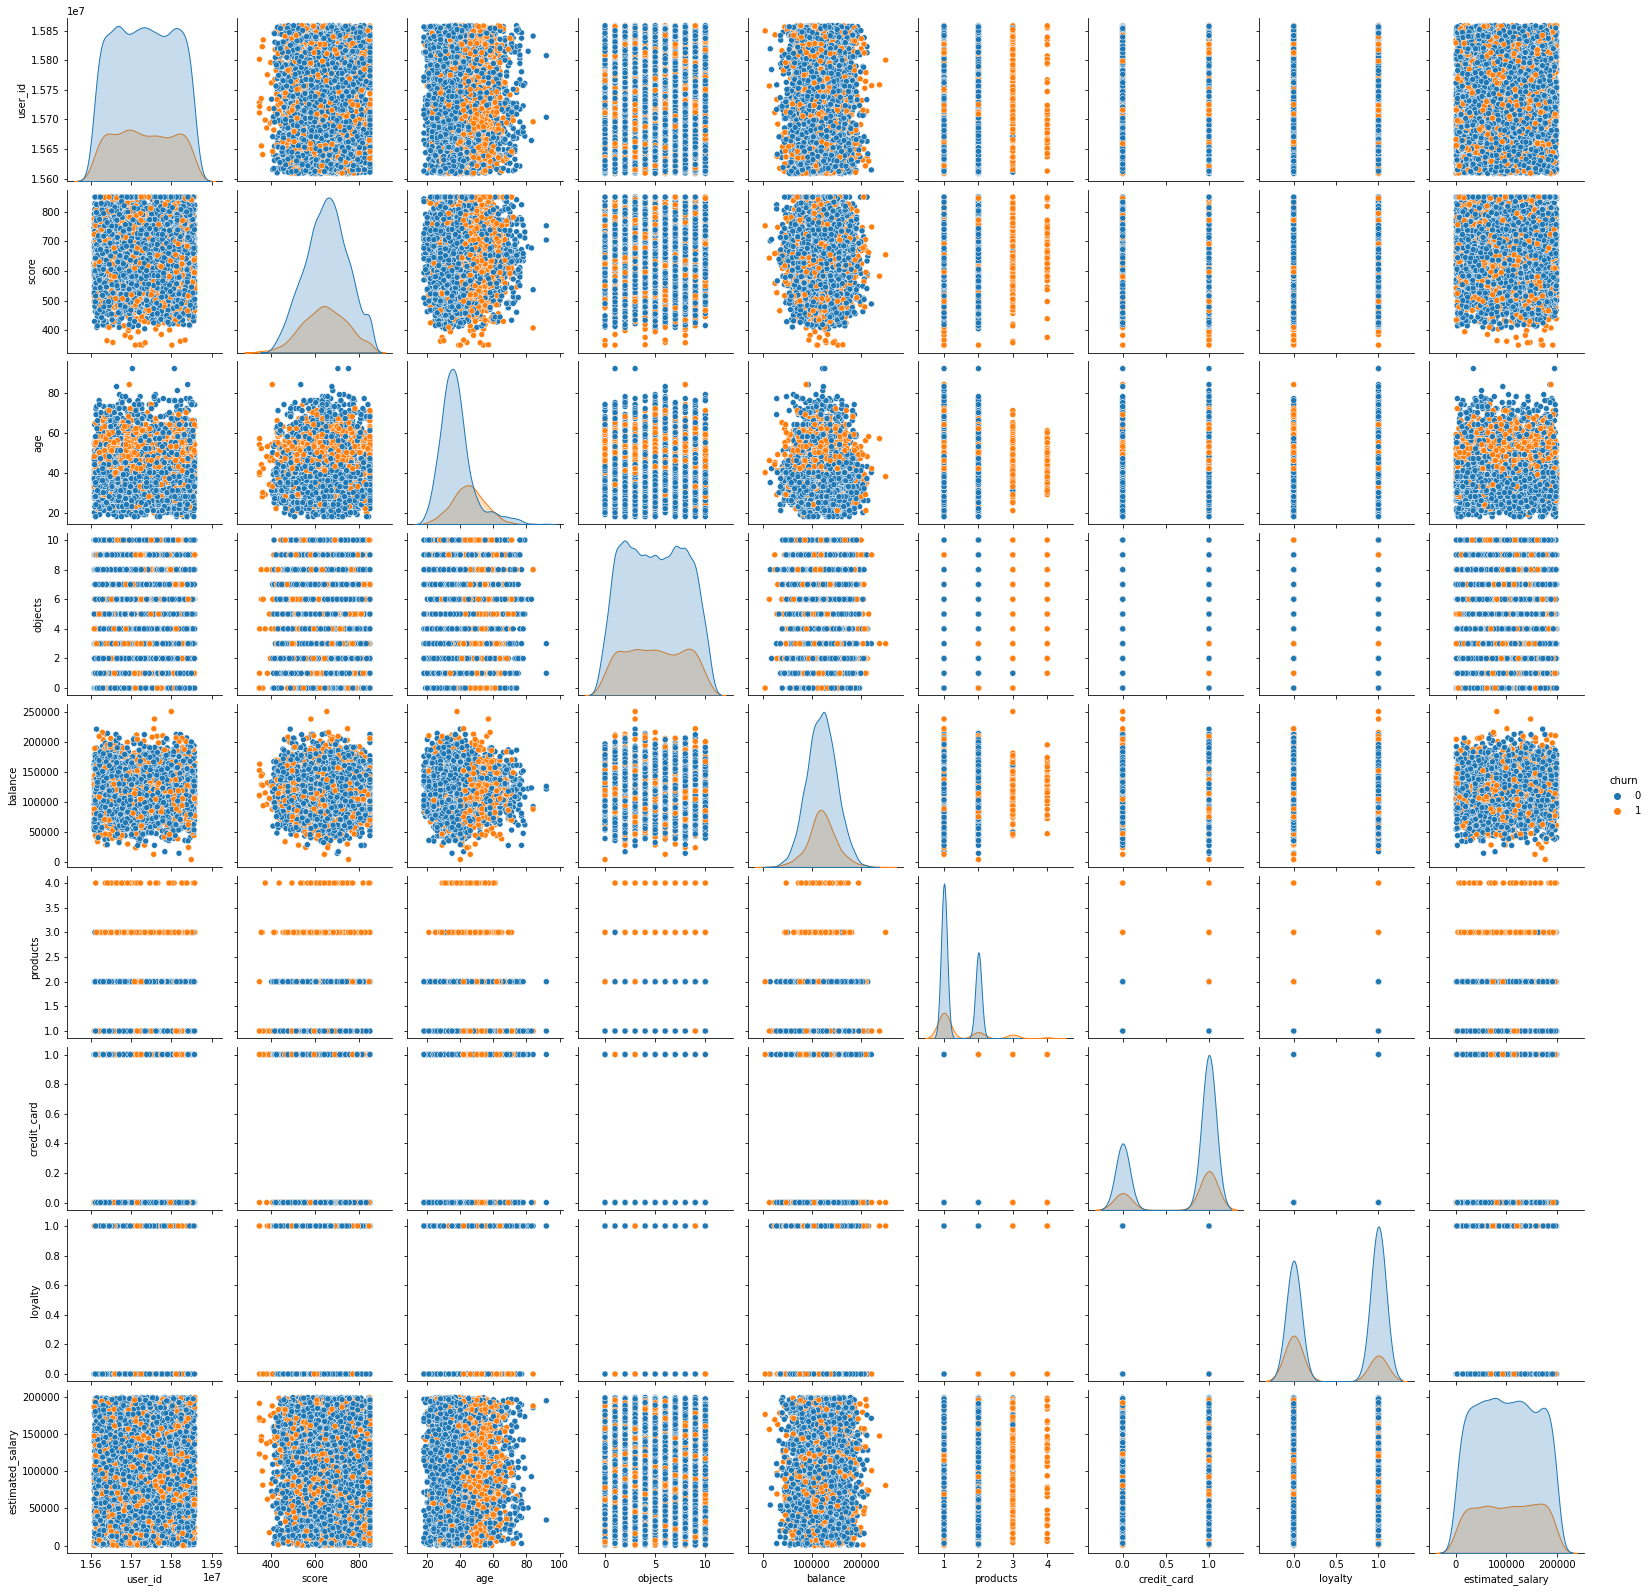

In [13]:
sns.pairplot(df.loc[df['balance'].isnull() == True], hue='churn')
sns.pairplot(df.loc[df['balance'].isnull() == False], hue='churn') 

Видим что нет сильной зависимостей с пропуском баланса и продукта и факта оттока, заполню пропуски 0, так как установить точную причину почему этих данных нет - невозможно, а на исход задачи это не повлияет

In [14]:
df['balance'].fillna(0, inplace=True)

Проверим все ли пропуски заменены

In [15]:
df['balance'].isna().sum()

0

**Вывод по 2 пункту:**\
*данные не содержат дубликатов, названия колонок и типы данных в них приведены к нужному в дальнейшей работе виду. Пропущенные значаения в балансе заполнены 0 *

## Исследовательский анализ данных

### Проверим как выглядит распределение данных по колонкам

Посотрим как распределены данные, удобнее выполнить через функцию

In [16]:
#функция для построение гистограммы для провери нормальности данных
def normdis(column, title=''):
    """Функция, строящая гистограммы.
    Функция принимает на вход  колонку, заголовок,
    выводит гистограмму.
    """
    fig = plt.figure(figsize=(15,6)) #размер графика
    sns.set_theme()
    sns.distplot(df[column], kde=True)
    plt.title(title,fontsize=16,pad = 15) #подписали график
    plt.show()

Проверим на выбивающиеся значения по количественным данным: баланса на счете, распределение зарплаты

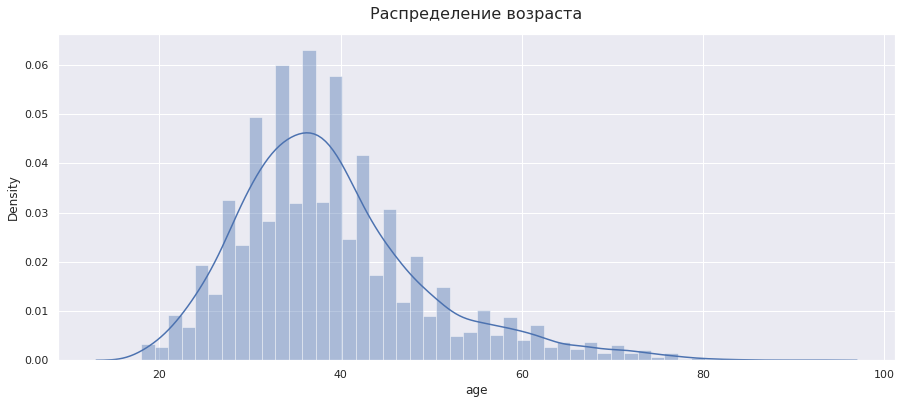

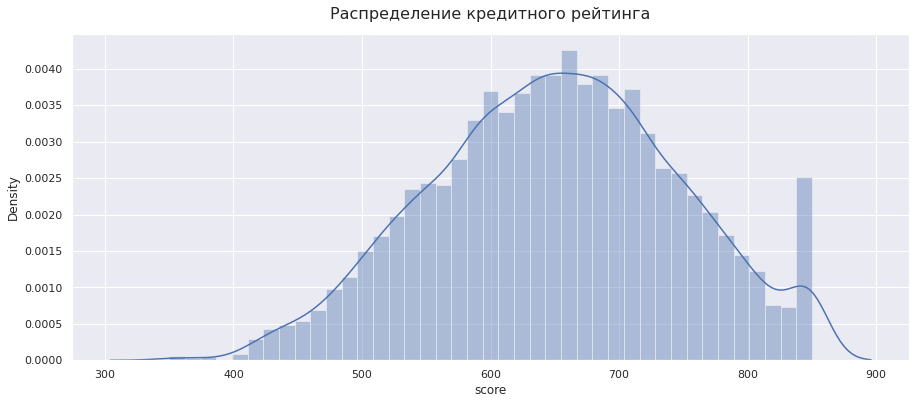

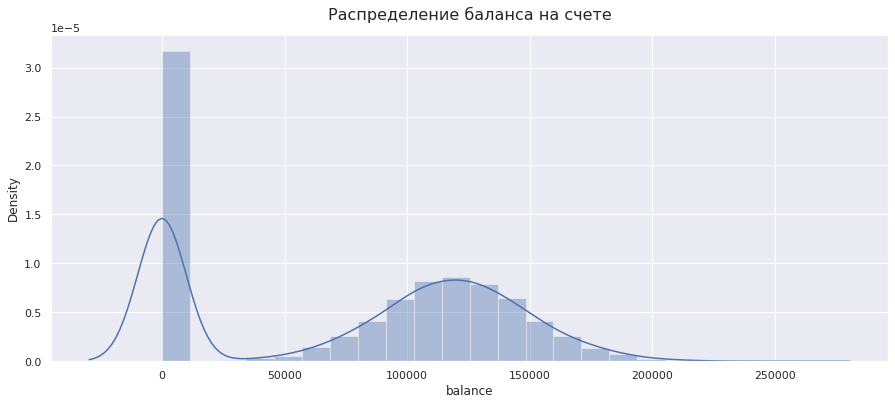

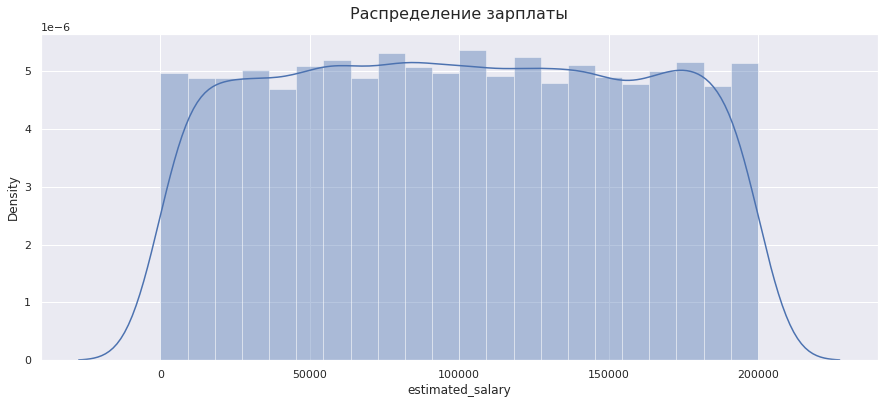

In [17]:
# Проверим на выбивающиеся значения по возрасту
normdis('age', title='Распределение возраста')
# по рейтингу
normdis('score', title='Распределение кредитного рейтинга')
# по балансу на счете
normdis('balance', title='Распределение баланса на счете')
# по зарплате
normdis('estimated_salary', title='Распределение зарплаты')

Распределение зарплаты равомерное, распределение баланса похоже на нормальное (помнис что клиентов без баланса мы заполнили 0).

Возраст клиентов распределен нормально со смещением вправо. \
    Проверим категориальные данные на выбивающиеся значения: Города,  Пол, Количество объектов и продуктов, кол-во клинтов пользуещих кред.карто, кол-во актиынх клинетов и ушедших

In [18]:
lists = ['city', 'gender','age', 'objects', 'products', 'credit_card', 'loyalty']
for item in lists:
    display(item)
    df[item].value_counts()

'city'

'gender'

'age'

'objects'

'products'

'credit_card'

'loyalty'

Количество объектов в собственности варьируется от 0 до 10 и распределено примерно одинаково, за исключением крайних значений 0 и 10, по которым количество клиентов примерно в 2 раза ниже. Количество используемых банковских продуктов: от 1 до 4, наибольшее число клиентов пользуется одним продуктом.
70% клиентов имеют кредитные карты, примерно 52% клиентов активны, к ушедшим клиентам относятся 20% датасета.

Посмотрим на распределние по признаков ушел/остался

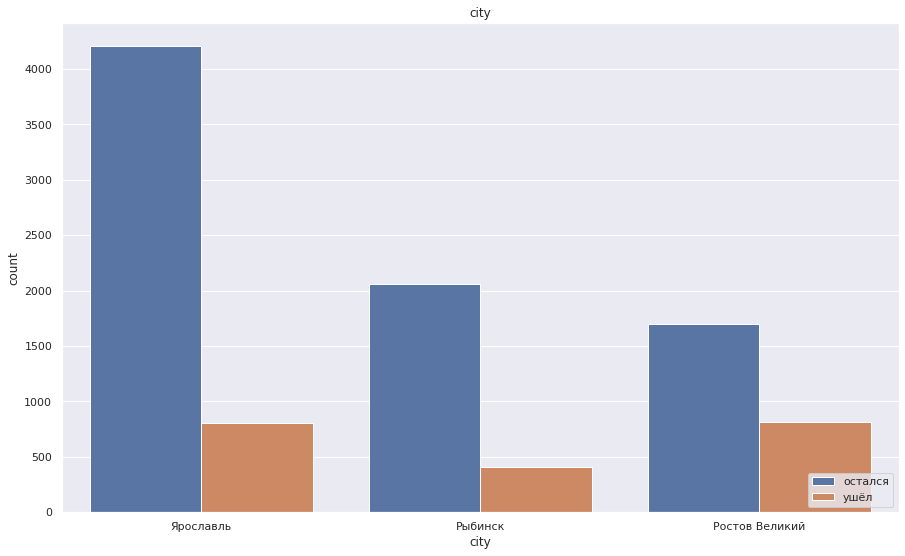

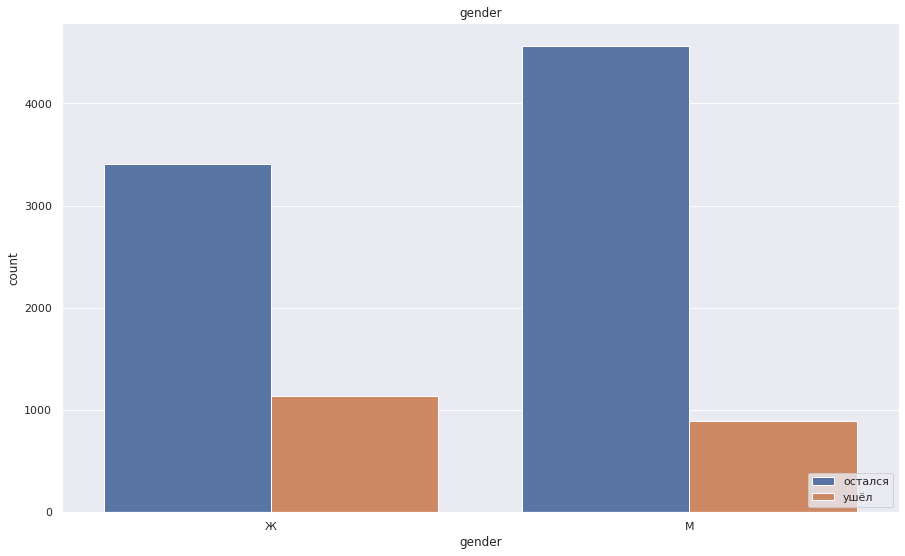

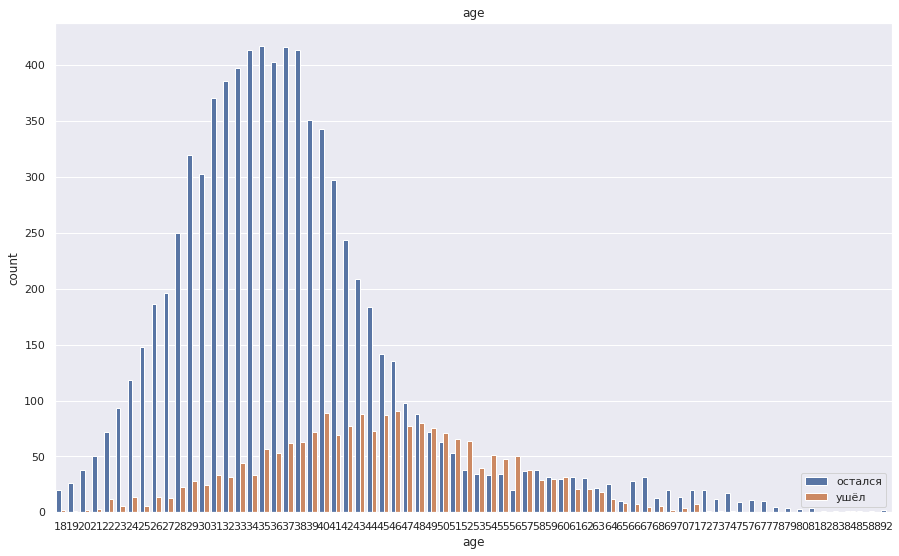

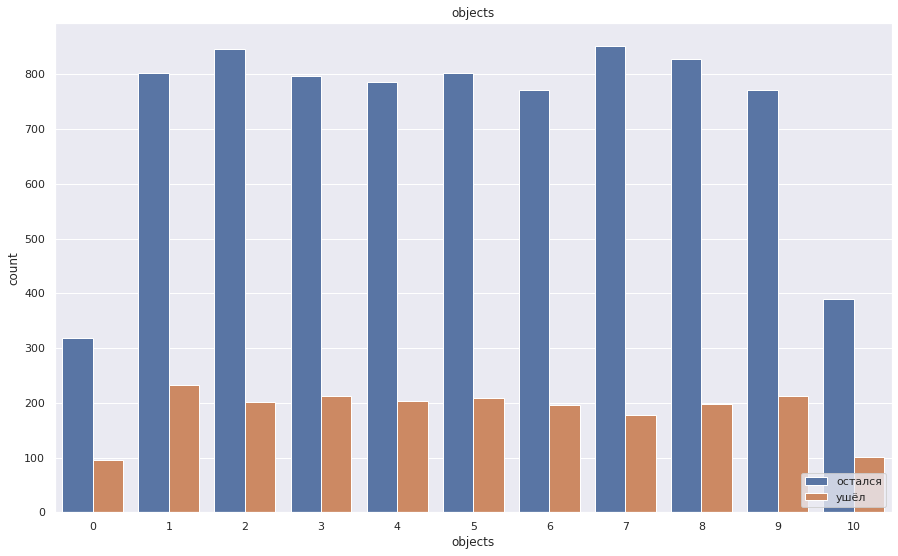

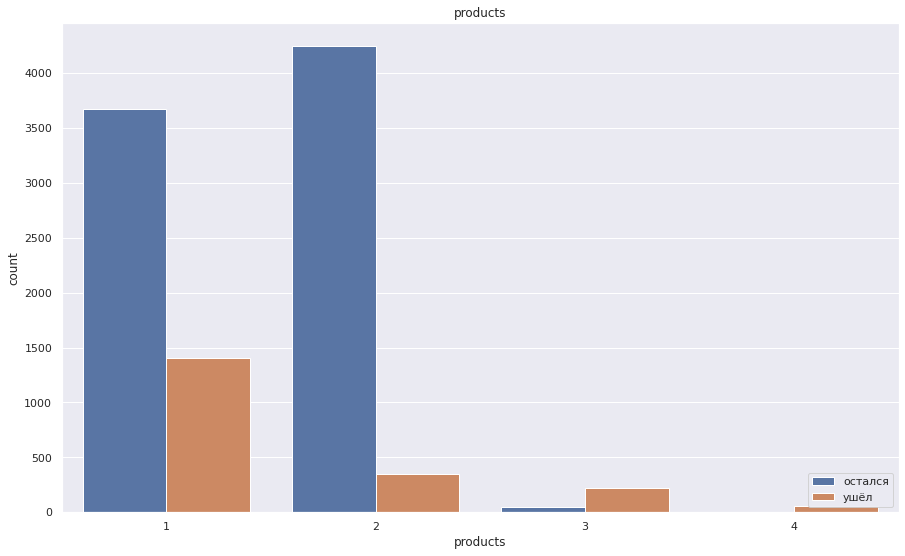

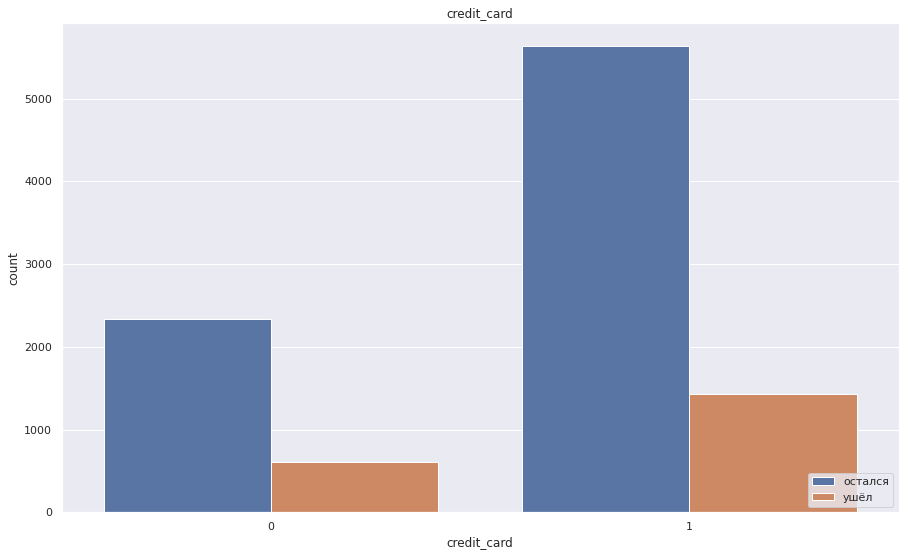

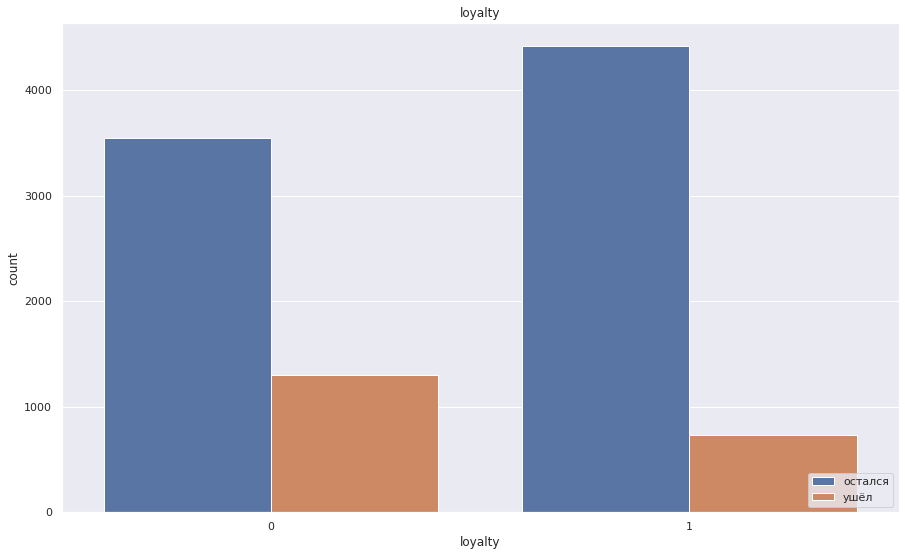

In [19]:
for item in lists:
    plt.figure(figsize=(15, 9));
    sns.countplot(x = df[item], hue='churn', data=df);
    plt.title(item);
    plt.legend(["остался", "ушёл"], loc ="lower right")
    plt.show();

Женщины и мужчины в 0 группе активнее, возраст, собственность 0 группы выше, баланс одинаков. А вот рользователи продуктом 1 и 2 пользуются чаще и постоянно, а пользователи с продуктом 3 и 4 не очень, и они уходят. Кредиткой 1 группа пользуется больше и являются постоянными клиентами.



Text(0.5, 1.0, 'Корреляция признаков клиентов по полному датасету')

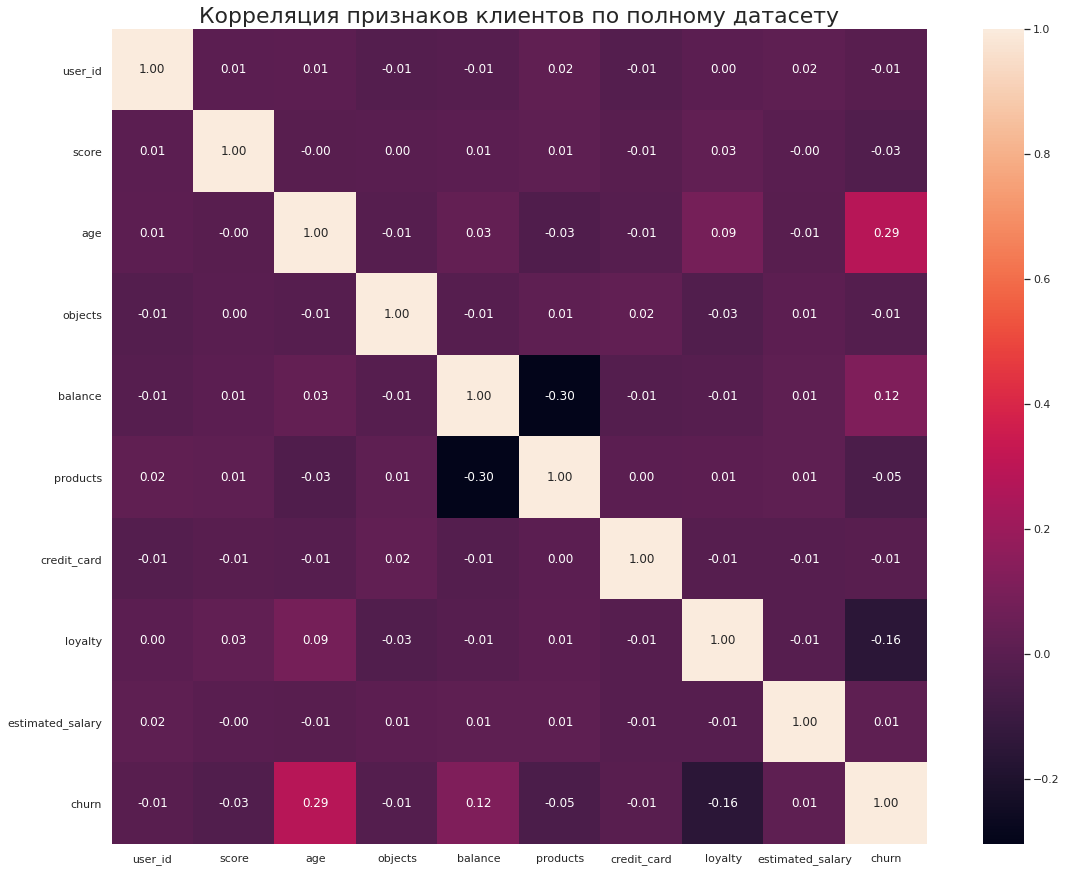

In [20]:
#матрица корреляции по всем признакам:
corr = df.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corr, annot = True, fmt = '0.2f', square=True);
plt.title('Корреляция признаков клиентов по полному датасету', fontsize=22)

Есть небольшая прямая корреляция между возрастом и оттоком и обратная корреляция между оттоком и количеством продуктов и активностью. Связь между возрастом и оттоком я далее более подробно рассмотрю. По продуктам и активности получается, что чем больше продуктов и активности, тем меньше отток - ну это логично

In [21]:
df

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,101348,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931,1
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,93826,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,0.00,2,1,0,96270,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699,0
9997,15627268,709,Ярославль,Ж,36,7,0.00,1,0,1,42085,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888,1


### Сегментация клиентов по потреблению

Построим диаграмму распределения  клиентов в зависимости от продуктов 


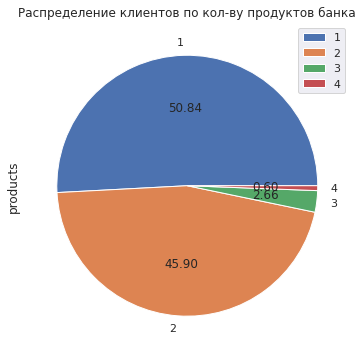

In [22]:
#platforms['sales_share'] = df['products'].value_counts()
df['products'].value_counts().plot(kind='pie', autopct='%1.2f', figsize =(6,6),legend = True)
plt.title('Распределение клиентов по кол-ву продуктов банка');

По количеству используемых продуктов клиенты распределяются следующим образом: 51% клиентов используют 1 продукт, 46% - использут 2 продукта. 3 или 4 продукта используют чуть более 3% клиентов.

Посмотрим как распделены клинеты банка по городам

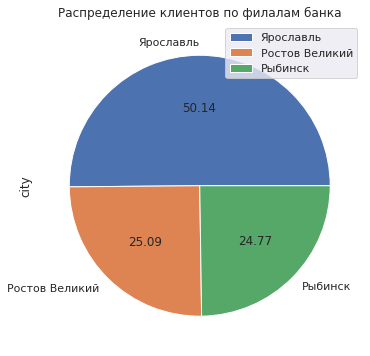

In [23]:
df['city'].value_counts().plot(kind='pie', autopct='%1.2f', figsize =(6,6),legend = True)
plt.title('Распределение клиентов по филалам банка');

Посмотрим на долю ушедших клиентов в зависимости от числа продуктов  

In [24]:
use_prod = df.groupby(['products']).agg({'churn':'mean', 'user_id':'count'}).reset_index()
use_prod.rename(mapper = {'products':'Кол-во продуктов','churn':"Доля ушедих клинетов", 'user_id':'Кол-во клиентов'}, 
              axis=1).set_index('Кол-во продуктов').style.format('{:.2f}')


,Доля ушедих клинетов,Кол-во клиентов
Кол-во продуктов,,
1,0.28,5084.00
2,0.08,4590.00
3,0.83,266.00
4,1.00,60.00


Аналогично посмотрим на долю ушедших клиентов в зависимости от возраста, в начале выделим ворастные группы

In [25]:
def age_categ(row):
    """Функция, категоризирующая клиентов по возрасту.
    Функция принимает на вход колонку age, выводит категорию возраста.
    """
    if (row['age'] >= 30 and row['age'] <= 40):
        return 'от 30 до 40 лет'
    if (row['age'] > 40 and row['age'] <= 60):
        return 'от 40 до 60 лет'
    if row['age'] > 60:
        return 'более 60 лет'
    else:
        return 'до 30 лет'

In [26]:
# Добавляем категорию возраста
df['age_category'] = df.apply(age_categ, axis = 1)
df

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,age_category
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,101348,1,от 40 до 60 лет
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542,0,от 40 до 60 лет
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931,1,от 40 до 60 лет
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,93826,0,от 30 до 40 лет
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084,0,от 40 до 60 лет
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,0.00,2,1,0,96270,0,от 30 до 40 лет
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699,0,от 30 до 40 лет
9997,15627268,709,Ярославль,Ж,36,7,0.00,1,0,1,42085,1,от 30 до 40 лет
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888,1,от 40 до 60 лет


In [27]:
bank_age_category = df.groupby('age_category')
bank_age_category.mean().round(2)

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
age_category,,,,,,,,,,
более 60 лет,15733672.72,654.55,67.51,4.91,75742.60,1.51,0.71,0.81,98125.69,0.25
до 30 лет,15732070.47,651.14,25.93,5.10,73698.72,1.56,0.71,0.51,100854.76,0.08
от 30 до 40 лет,15733908.78,651.40,35.18,5.01,75248.45,1.54,0.71,0.50,99557.89,0.12
от 40 до 60 лет,15734166.74,648.27,47.24,4.99,79960.74,1.51,0.69,0.50,100794.64,0.40


Видим, что клиенты старше 60 лет, вероятно, получающие пенсию в банке, показывают самую высокую активность 81% и процент оттока 25%. Клиента от 40 до 60 лет имеют самый высокий процент оттока - 40%. Наименьший процент оттока у клиентов до 30 лет. Показатели кредитного скоринга выше у клиентов старше 60 лет.

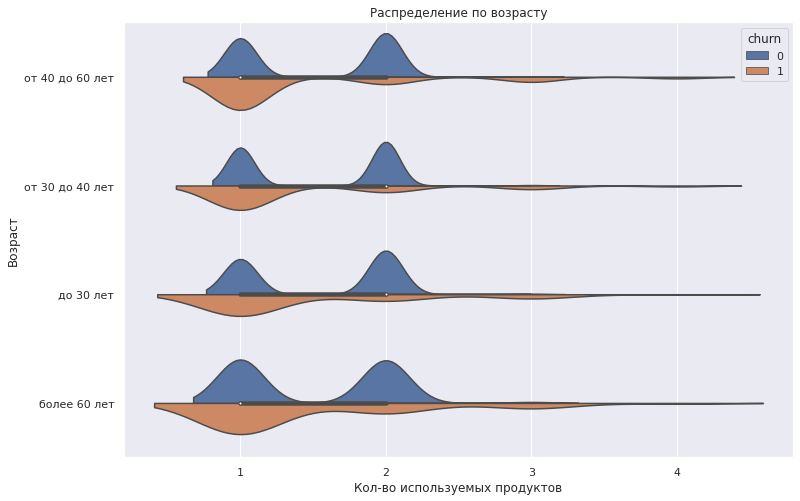

In [28]:
# Построим график типа violin для распределения по количеству используемых продуктов и возрасту
plt.figure(figsize=(12, 8))
sns.violinplot(x='products', y='age_category', hue='churn', data=df, split=True)
plt.ylabel("Возраст")
plt.xlabel("Кол-во используемых продуктов")
plt.title("Распределение по возрасту")
plt.show();

по размеру выделяются две группы - с одним продуктом и с двумя продуктами. Клиенты с 3-4 продуктами малочисленны (вместе они составляют ок 3% от датасета), но у группы с 4 продуктами 100% отток, этим она интересна, и у группа с 3 продуктами тоже высокая доля оттока.

Доля оттока на 20% меньше у клиентов с двумя продуктами по сравнению с клиентами с одним продуктом.

Вторая группа более молодая и более активная, чем все остальные.

### Проверка гипотез

Проверим гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
В начале проверим данные на нормальность

In [29]:
def hist(data1, data2, column, title = "", label1="", label2=""):
    """Функция принимает на вход колонку, заголовок, название оси y,
    выводит гистограмму.
    """
    plt.figure(figsize=(10, 7))
    ax = sns.distplot(data1[column],  bins=50, label=label1, kde=True)
    sns.distplot(data2[column], bins=50, label=label2, kde=True)
    plt.axes().set_title(title, fontsize=18, pad = 15)  
    plt.legend()
    plt.show()

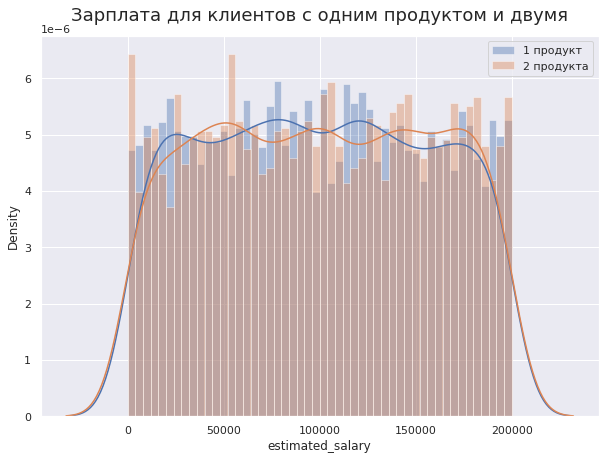

In [30]:
# Гистограмма распределения дохода клиентов для тех, кто пользуется одним продуктом и двумя
hist(df.query('products == 1'), 
        df.query('products == 2'), 
        'estimated_salary', 
        title = "Зарплата для клиентов с одним продуктом и двумя", 
        label1="1 продукт", 
        label2="2 продукта")

Данные распределены не нормально, распределение равномерное. Поэтому проверим гипотезы о схожести распределения выборок, применяя U-критерий Манна-Уитни.

Нулевая гипотеза: Распределение зарплат клиентов, использующих 1 продукт, соответствует распределению зарплат клиентов, использующих 2 продукта.

Альтернативная гипотеза: Распределение зарплат клиентов, использующих 1 продукт, не соответствует распределению зарплат клиентов, использующих 2 продукта.

Решаем вопрос о принятии или отвержении нулевой гипотезы по p-value, как вероятность ошибки при отклонении нулевой гипотезы. То есть, чем выше p-value тем скорее отклонение нулевой гипотезы будет ошибочным. Критический уровень статистической значимости примем за 5%, что означает, что мы допускаем 5% вероятность ошибки в полученном результате. При значениях p-value менее 0,05 следует признать, что можем отвергнуть нулевую гипотезу.

In [31]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.mannwhitneyu(df.query('products == 1')['estimated_salary'], 
                       df.query('products == 2')['estimated_salary'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.40796286066317733
Не получилось отвергнуть нулевую гипотезу


Нет оснований отвергать нулевую гипотезу, что распределение зарплат клиентов, использующих 1 продукт соответствует распределению зарплат клиентов, использующих 2 продукта.

Проверим гипотезу различия score между теми клиентами, которые ушли и теми, которые остались. \
Нулевая гипотеза- средний счет между оставшимися и ушедними пользователями равен.\
Альтернативная гипотеза - средний счет между оставшимися и ушедними пользователями отличается.

Проведем проверку на нормальность

In [32]:
#формируем промежуточный данные
df_churn_0=df.query("churn==0")
df_churn_1=df.query("churn==1")

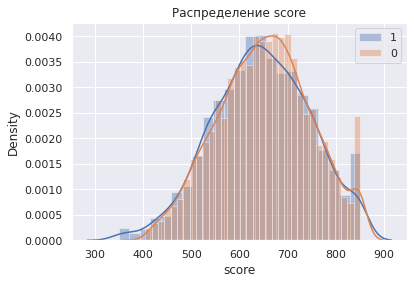

In [33]:
sns.distplot(df_churn_1['score'],label='1')
sns.distplot(df_churn_0['score'],label='0')
plt.title('Распределение score')
plt.legend();
plt.show();

Данные можно считать распределенными нормально.

In [34]:
alpha=0.05
print('Дисперсия ушедних:',df_churn_1['score'].var())
print('Дисперсия оставшихся:',df_churn_0['score'].var())

Дисперсия ушедних: 10064.403893876835
Дисперсия оставшихся: 9149.656541843884


Проверим гипотезу различия score между теми клиентами, которые ушли и теми, которые остались. \
Нулевая гипотеза- средний счет между оставшимися и ушедними пользователями равен. \
Альтернативная гипотеза - средний счет между оставшимися и ушедними пользователями отличается.

In [35]:
results = st.ttest_ind(
    df_churn_0['score'], 
    df_churn_1['score'], equal_var=False)
p_value = results.pvalue

In [36]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.008464728991832877
Отвергаем нулевую гипотезу


Мы отвергли гипотезу о равестве средних score ушедших и оставшихся. Получается, уходящие пользователи становятся менее заинтересованными и их активнсть немного падает.



## Вывод

По результатам исследования:\
*Более половины клиентов банка имеют только 1 продукт.\
Доля клиентов с 3 и 4 продуктами менее 4 процентов.\
В Ярославле и Ростове средний показатель оттока почти в два раза выше в Рыбинске\
Нет клиентов, которые использовали 4 продукта и остались;\
Для клиентов, использующих 1 продуктом, показатель оттока самый высокий\
Клиенты в возрасте от 40-60 имеют высокую степень оттока, при этом пол клиента не сильно сказывается на желании уйти из банка
По продуктам и активности получается, что чем больше продуктов и активности, тем меньше отток*

**РЕКОМЕНДАЦИИ**\
Уточнить обстоятельства ухода клиентов, использующих 4 продукта. Если использовали кредитные продукты, возможно, другой банк предложил более привлекательные ставки, что привело к рефинансированию и закрытию счетов.\
С учтём того, более 50% клиентов банка имею всего 1 продукт, а также что отток клиентов возраста 40-60 имеют высокую степень, нужно начать именно с этого сегмента клиентов, предложив им оформить 2 и третий продут на выгодных условиях:\
для клиентов женского пола не пенсионного возраста оформить ипотеку с использованием материнского капитала или открыть зарплатный проект , для тех женщин что уже на пенсии открыть пенсионный или накопительный вклад\
для мужчин пенсионного возраста также предложить открыть пенсионный или накопительный вклад\
для мужчин не пенсионного возраста в группе оттока предложить открыть зарплатный проект или ознакомить с семейными продуктами (семейный счет, дебетовая карта для ребенка, автокредитование) также могут стимулировать активность клиента.